# Quiz 7.1  

An electric company is trying to determine the electrical energy needs for the residential customers in its service territory. By identifying certain customer and environmental characteristics, the utility hopes to build a multiple regression model for $Y$, the monthly kilowatthour usage. The independent variables under consideration are  

$X_1 =$ Square feet of living space  

$X_2 =$ Average monthly temperature  

$X_3 =$ Age of residence  

$X 4 =$ Proportion of available sunshine hours  

The data file is stored in https://s3-us-west-2.amazonaws.com/dsci/6002/data/elec.csv  

1) Using backward stepwise regression, build a model to describe electricity usage.  

2) Test if the linear regression assumptions are met.  

In [7]:
%pylab inline
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from seaborn import lmplot

Populating the interactive namespace from numpy and matplotlib


In [4]:
elec = pd.read_csv('https://s3-us-west-2.amazonaws.com/dsci/6002/data/elec.csv ')
elec.head()

,y,x1,x2,x3,x4
0,1805,950,35,31,0.24
1,1029,1600,41,27,0.29
2,1020,2100,48,30,0.31
3,515,1055,52,29,0.39
4,942,1250,60,18,0.40


In [8]:
X = elec.drop('y', axis=1)
Y = elec.y
X = sm.add_constant(X)  # <- add in constant term

model = sm.OLS(Y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     12.04
Date:                Mon, 10 Oct 2016   Prob (F-statistic):           4.83e-05
Time:                        13:29:31   Log-Likelihood:                -177.49
No. Observations:                  24   AIC:                             365.0
Df Residuals:                      19   BIC:                             370.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       -177.3477    482.664     -0.367      0.717     -1187.575   832.880
x1             0.6625      0.125      5.291      0.000         0.400     0.925
x2            -8.0370     11.107     -0.724      0.478       -31.285    15.211
x3            -3.0830     11.615     -0.265      0.794       -27.394    21.228
x4          2335.6939   1237.745      1.887      0.075      -254.937  4926.325
==============================================================================
Omnibus:                       13.481   Durbin-Watson:                   1.780
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               12.357
Skew:                           1.482   Prob(JB):                      0.00207
Kurtosis:                       4.890   Cond. No.                     2.77e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.77e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
X2.head()

,const,x1,x2,x4
0,1,950,35,0.24
1,1,1600,41,0.29
2,1,2100,48,0.31
3,1,1055,52,0.39
4,1,1250,60,0.40


In [21]:
X2 = X.drop('x3', axis=1)
model2 = sm.OLS(Y, X2)
results2 = model2.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     16.81
Date:                Mon, 10 Oct 2016   Prob (F-statistic):           1.09e-05
Time:                        13:34:30   Log-Likelihood:                -177.54
No. Observations:                  24   AIC:                             363.1
Df Residuals:                      20   BIC:                             367.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       -262.2157    353.066     -0.743      0.466      -998.699   474.267
x1             0.6756      0.112      6.019      0.000         0.442     0.910
x2            -8.8422     10.434     -0.847      0.407       -30.606    12.922
x4          2462.6239   1114.790      2.209      0.039       137.213  4788.034
==============================================================================
Omnibus:                       12.258   Durbin-Watson:                   1.775
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               10.661
Skew:                           1.418   Prob(JB):                      0.00484
Kurtosis:                       4.618   Cond. No.                     2.55e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.55e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
X3 = X2.drop('x2', axis=1)
model3 = sm.OLS(Y, X3)
results3 = model3.fit()
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     25.19
Date:                Mon, 10 Oct 2016   Prob (F-statistic):           2.64e-06
Time:                        13:34:57   Log-Likelihood:                -177.96
No. Observations:                  24   AIC:                             361.9
Df Residuals:                      21   BIC:                             365.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       -407.6312    306.489     -1.330      0.198     -1045.010   229.748
x1             0.6659      0.111      6.005      0.000         0.435     0.897
x4          1636.8710    537.970      3.043      0.006       518.102  2755.640
==============================================================================
Omnibus:                       11.393   Durbin-Watson:                   1.653
Prob(Omnibus):                  0.003   Jarque-Bera (JB):                9.572
Skew:                           1.355   Prob(JB):                      0.00835
Kurtosis:                       4.493   Cond. No.                     1.34e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.34e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

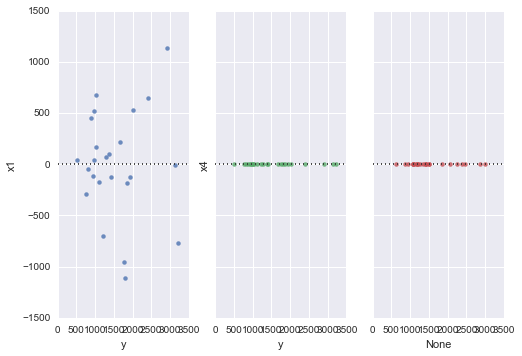

In [24]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharex=True, sharey=True)
ax1 = sns.residplot(Y,elec['x1'], ax=ax1)
ax2 = sns.residplot(Y,elec['x4'], ax=ax2)
fitted_vals = results3.fittedvalues
std_resids = results3.resid_pearson
ax3 = sns.residplot(fitted_vals, std_resids, ax=ax3);

#### commentary on linearity
seems that the residual scatter plots indicate linearity for the model, but not for the x1 variable.

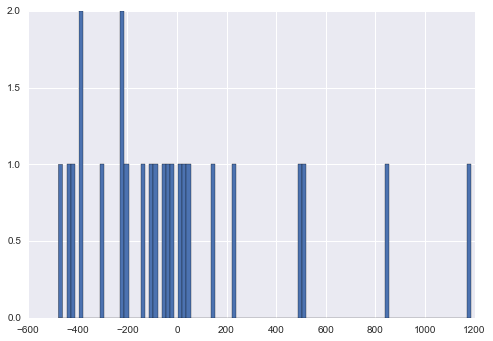

In [25]:
res = results3.resid
hist(res, bins=100);